In [2]:
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('Boston.csv')
df.head(2)

,CRIME,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,high,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5
1,low,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2


In [4]:
df['CRIME'].value_counts()

very_low    50
low         25
high        25
Name: CRIME, dtype: int64

In [5]:
crime = pd.get_dummies(df['CRIME'], drop_first = True)
df2 = pd.concat([df, crime], axis = 1)
df2 = df2.drop(['CRIME'], axis = 1)
df2.head(2)

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,low,very_low
0,0.0,18.10,0,0.718,3.561,87.9,1.6132,24.0,666,20.2,354.7,7.12,27.5,0,0
1,0.0,8.14,0,0.538,5.950,82.0,3.9900,4.0,307,21.0,232.6,27.71,13.2,1,0


In [6]:
train_val, test = train_test_split(df2,test_size = 0.2,
random_state = 0)

In [7]:
train_val.isnull().sum()

ZN          0
INDUS       0
CHAS        0
NOX         1
RM          0
AGE         0
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
PRICE       0
low         0
very_low    0
dtype: int64

In [8]:
train_val_mean = train_val.mean() # 各列の平均値の計算
train_val2=train_val.fillna(train_val_mean) # 平均値で穴埋め

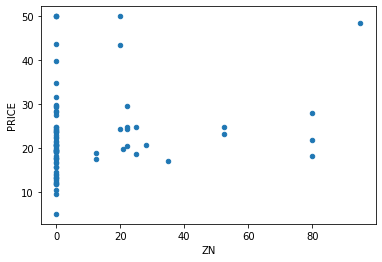

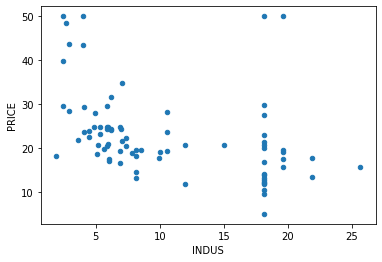

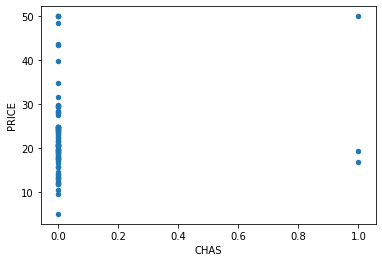

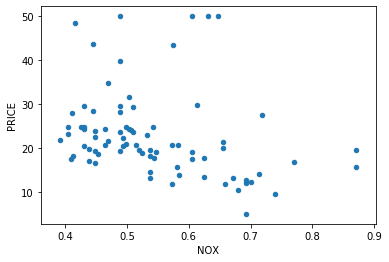

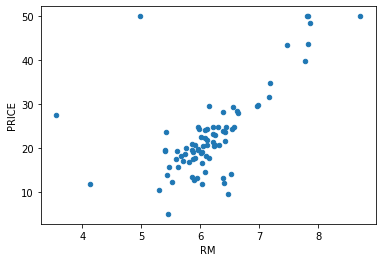

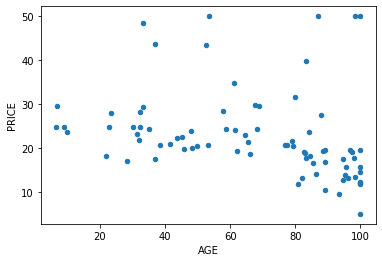

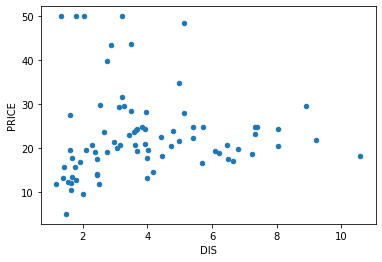

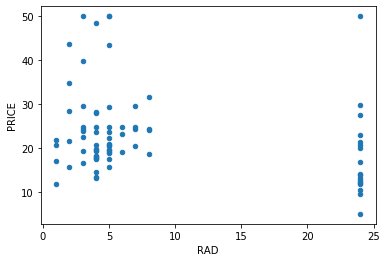

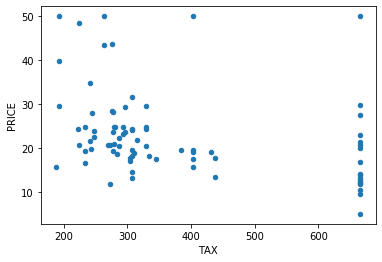

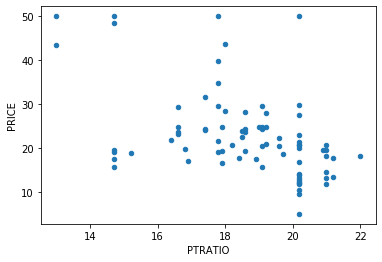

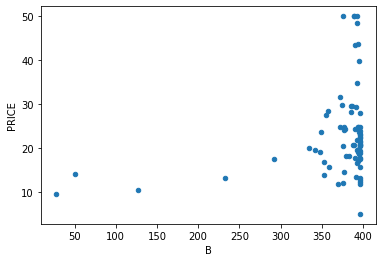

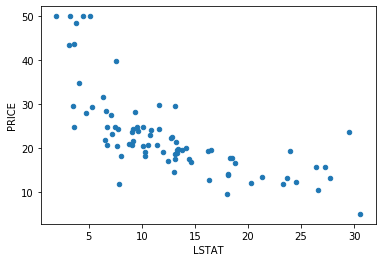

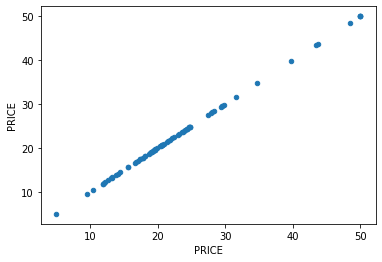

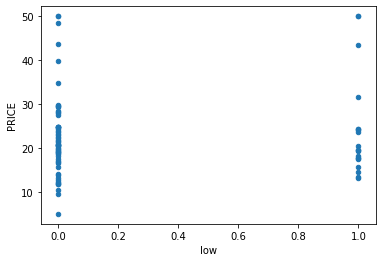

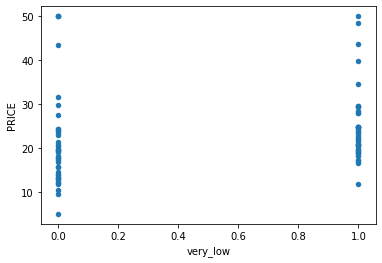

In [9]:
colname = train_val2.columns
for name in colname:
    train_val2.plot(kind = 'scatter', x = name, y = 'PRICE')

In [10]:
# RMの外れ値
out_line1 = train_val2[(train_val2['RM'] < 6) &
(train_val2['PRICE'] > 40)].index
# PTRATIOの外れ値
out_line2 = train_val2[(train_val2['PTRATIO'] > 18) &
(train_val2['PRICE'] > 40)].index

print(out_line1, out_line2)

Int64Index([76], dtype='int64') Int64Index([76], dtype='int64')


In [11]:
train_val3 = train_val2.drop([76], axis = 0)

In [12]:
col = ['INDUS', 'NOX', 'RM', 'PTRATIO', 'LSTAT', 'PRICE']

train_val4 = train_val3[col]
train_val4.head(3)

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
43,5.86,0.431,6.108,19.1,9.16,24.3
62,5.86,0.431,6.957,19.1,3.53,29.6
3,21.89,0.624,6.151,21.2,18.46,17.8


In [13]:
train_val4.corr()

,INDUS,NOX,RM,PTRATIO,LSTAT,PRICE
INDUS,1.000000,0.785722,-0.403129,0.249438,0.578406,-0.470889
NOX,0.785722,1.000000,-0.272996,0.077533,0.484295,-0.325289
RM,-0.403129,-0.272996,1.000000,-0.404568,-0.560454,0.753771
PTRATIO,0.249438,0.077533,-0.404568,1.000000,0.326563,-0.542449
LSTAT,0.578406,0.484295,-0.560454,0.326563,1.000000,-0.693490
PRICE,-0.470889,-0.325289,0.753771,-0.542449,-0.693490,1.000000


In [16]:
train_cor = train_val4.corr()['PRICE']
train_cor

INDUS     -0.470889
NOX       -0.325289
RM         0.753771
PTRATIO   -0.542449
LSTAT     -0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

In [17]:
se = pd.Series([1, -2, 3, -4]) # シリーズの作成

# seの各要素にabs関数を適応させた結果をシリーズ化
se.map(abs)

0    1
1    2
2    3
3    4
dtype: int64

In [18]:
abs_cor = train_cor.map(abs)
abs_cor

INDUS      0.470889
NOX        0.325289
RM         0.753771
PTRATIO    0.542449
LSTAT      0.693490
PRICE      1.000000
Name: PRICE, dtype: float64

In [16]:
# 降順に並べ替える
abs_cor.sort_values(ascending = False)

PRICE      1.000000
RM         0.753771
LSTAT      0.693490
PTRATIO    0.542449
INDUS      0.470889
NOX        0.325289
Name: PRICE, dtype: float64

In [23]:
col =['RM', 'LSTAT', 'PTRATIO']
x = train_val4[col]
t = train_val4[['PRICE']]

#訓練データと検証データに分割
x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler

sc_model_x = StandardScaler()
sc_model_x.fit(x_train)

# 各列のデータを標準化してsc_xに代入
sc_x = sc_model_x.transform(x_train)
sc_x # 表示

array([[-0.10238334, -0.89546338, -0.97250163],
       [-0.11741281, -0.37386886,  1.21732721],
       [-0.92274224,  2.49984836,  0.83648742],
       [ 1.60346221, -1.37747891, -2.59107078],
       [-0.21134704, -0.36821472, -0.30603198],
       [ 0.28337322, -0.54632017, -0.87729168],
       [ 2.01927772, -1.55275729, -1.7817862 ],
       [-0.42551707, -0.58448562,  0.36043767],
       [-0.39420567,  0.21557535, -1.7817862 ],
       [-0.21886178, -0.00634969,  0.02720284],
       [-0.48438252,  0.24525959,  0.83648742],
       [ 0.02411475,  0.04453758,  0.83648742],
       [ 0.31092726, -1.31669689,  0.31283269],
       [ 2.08315299, -1.28559912, -1.7817862 ],
       [-0.98411261,  1.56550154,  0.07480782],
       [-0.28398951,  0.07704889, -0.78208173],
       [-0.9039554 ,  1.91040415, -1.7817862 ],
       [ 0.23828479,  1.52450902,  0.83648742],
       [-0.12993738, -0.28622968, -0.49645188],
       [-0.18629791, -0.73573389,  0.55085757],
       [-0.37917619,  0.48697412,  0.836

In [25]:
# array 型だと見づらいのでデータフレームに変換
tmp_df = pd.DataFrame(sc_x, columns = x_train.columns)
# 平均値の計算
tmp_df.mean()

RM        -3.101575e-16
LSTAT      1.727014e-16
PTRATIO   -1.436241e-16
dtype: float64

In [26]:
tmp_df.std() # 標準偏差の計算

RM         1.008032
LSTAT      1.008032
PTRATIO    1.008032
dtype: float64

In [27]:
sc_model_y = StandardScaler()
sc_model_y.fit(y_train)

sc_y = sc_model_y.transform(y_train)

In [30]:
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

In [31]:
model.score(x_val, y_val)

-13.085044375040104

In [32]:
sc_x_val = sc_model_x.transform(x_val)
sc_y_val = sc_model_y.transform(y_val)
# 標準化した検証データで決定係数を計算
model.score(sc_x_val, sc_y_val)

0.7359028880291001

In [33]:
# 以下、やってはいけない間違いのコード
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x_val)
sc_x_val = sc_model_x2.transform(x_val)
sc_model_y2 = StandardScaler()
sc_model_y2.fit(y_val)
sc_y_val = sc_model_y2.transform(y_val)
model.score(sc_x_val, sc_y_val)

0.7918117863572239

In [34]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t,
    test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)
    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)
    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)
    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [35]:
x = train_val3.loc[ :, ['RM', 'LSTAT', 'PTRATIO']]
t = train_val3[['PRICE']]
s1,s2 = learn(x, t)
print(s1, s2)

0.7175897572515981 0.7359028880291001


In [36]:
x = train_val3.loc[ :, ['RM', 'LSTAT', 'PTRATIO','INDUS']]
t = train_val3[['PRICE']]
s1,s2 = learn(x, t)
print(s1, s2)

0.719025293018681 0.729553534494149


In [35]:
x['RM'] ** 2

43    37.307664
62    48.399849
3     37.834801
71    37.307664
45    35.557369
        ...    
96    33.166081
67    39.816100
64    39.050001
47    43.890625
44    34.222500
Name: RM, Length: 79, dtype: float64

In [37]:
# RM2乗のシリーズを新しい列として追加
x['RM2'] = x['RM'] ** 2
# コード8-29で、INDUS列を追加したので削除
x = x.drop('INDUS', axis = 1)
x.head(2)

,RM,LSTAT,PTRATIO,RM2
43,6.108,9.16,19.1,37.307664
62,6.957,3.53,19.1,48.399849


In [38]:
# インデックスを2000として新しい行を追加
x.loc[2000] = [10, 7, 8, 100]
print(x.tail(2)) # 確認

# 第8章の本筋には関係ないので削除
x = x.drop(2000, axis = 0)

         RM  LSTAT  PTRATIO       RM2
44     5.85   8.77     19.2   34.2225
2000  10.00   7.00      8.0  100.0000


In [39]:
s1, s2 = learn(x, t)
print(s1, s2)

0.8456207631185567 0.8372526287986775


In [40]:
# LSTAT列の2乗を追加
x['LSTAT2'] = x['LSTAT'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

# PTRATIO列の2乗を追加
x['PTRATIO2'] = x['PTRATIO'] ** 2
s1, s2 = learn(x, t)
print(s1, s2)

0.8565689444345094 0.8425282632102127
0.8643834988984441 0.8678022326740732


In [41]:
se1 = pd.Series([1, 2, 3])
se2 = pd.Series([10, 20, 30])
se1 + se2 # 対応する各要素を足し算したシリーズ


0    11
1    22
2    33
dtype: int64

In [42]:
x['RM * LSTAT'] = x['RM'] * x['LSTAT']
x.head(2)

,RM,LSTAT,PTRATIO,RM2,LSTAT2,PTRATIO2,RM * LSTAT
43,6.108,9.16,19.1,37.307664,83.9056,364.81,55.94928
62,6.957,3.53,19.1,48.399849,12.4609,364.81,24.55821


In [43]:
s1, s2 = learn(x, t)
print(s1, s2)

0.8668534967796696 0.8739347357775968


In [44]:
# 訓練データと検証データを合わせて再学習させるので
# 再度、標準化する
sc_model_x2 = StandardScaler()
sc_model_x2.fit(x)
sc_x = sc_model_x2.transform(x)

sc_model_y2 = StandardScaler()
sc_model_y2.fit(t)
sc_y = sc_model_y2.transform(t)
model = LinearRegression()
model.fit(sc_x, sc_y)

LinearRegression()

In [46]:
test2 = test.fillna(train_val.mean()) # 欠損値を平均値で補完
x_test = test2.loc[ :, ['RM','LSTAT', 'PTRATIO'] ]
y_test = test2[['PRICE']]

x_test['RM2'] = x_test['RM'] ** 2
x_test['LSTAT2'] = x_test['LSTAT'] ** 2
x_test['PTRATIO2'] = x_test['PTRATIO'] ** 2

x_test['RM * LSTAT'] = x_test['RM'] * x_test['LSTAT']

In [47]:
sc_x_test = sc_model_x2.transform(x_test)
sc_y_test = sc_model_y2.transform(y_test)

In [48]:
model.score(sc_x_test, sc_y_test)

0.7649249353669061

In [50]:
import pickle
with open('boston.pkl',"wb") as f:
    pickle.dump(model,f)
with open('boston_scx.pkl','wb') as f:
    pickle.dump(sc_model_x2,f)
with open('boston_scy.pkl','wb') as f:
    pickle.dump(sc_model_y2,f)
    